In [1]:
%matplotlib notebook

import sys
import logging
import matplotlib.pyplot as plt

sys.path.append ("../DesignTool")
from smdtLibs.configFile import ConfigFile
from targets import TargetList
from smdtLibs.inOutChecker import InOutChecker
from maskLayouts import MaskLayouts, shrinkMask
from smdtLibs import utils, drawUtils

In [2]:
logging.disable()

## Initialize configuration and read parameter file

In [3]:
config_fname = "../DesignTool/smdt.cfg"
param_fname = "../DesignTool/params.cfg"

config = ConfigFile(config_fname)
config.properties["params"] = ConfigFile(param_fname)

### Get the mask layout

In [4]:
layout = MaskLayouts['deimosOrig']

### Read the targets, check what is inside and group by pcode

In [5]:
input_fname = "../DeimosExamples/EvanKirby/n2419c.list"
tlist = TargetList(input_fname, useDSS=False, config=config)

# Check what is inside the mask
tlist.markInside (layout)

allTargets = tlist.targets
selectedTargets = allTargets[allTargets.selected > 0]
selectedTargets = selectedTargets[selectedTargets.pcode >= 0]

alignBoxes = allTargets[allTargets.pcode == -2]
guideBoxes = allTargets[allTargets.pcode == -1]

inTargets = allTargets[allTargets.inMask > 0]
inSelectedTargets = selectedTargets[selectedTargets.inMask > 0]
inAlignBoxes = alignBoxes[alignBoxes.inMask > 0]
inGuideBoxes = guideBoxes[guideBoxes.inMask >0]


before ['07:37:37.634', '+38:54:19.22', '2000100.00', 'I', '0', '3', '0', '60', '0', '4.0', '4.0', '1.5', '0']
after  ['07:37:37.634', '+38:54:19.22', '2000100.00', '100.00', 'I', '0', '3', '0', '60', '4.0', '4.0', '1.5', '0']
before ['07:37:39.463', '+38:53:32.63', '2000100.00', 'I', '0', '3', '0', '60', '0', '4.0', '4.0', '1.5', '0']
after  ['07:37:39.463', '+38:53:32.63', '2000100.00', '100.00', 'I', '0', '3', '0', '60', '4.0', '4.0', '1.5', '0']
before ['07:38:22.208', '+38:49:47.70', '2000100.00', 'I', '0', '3', '0', '60', '0', '4.0', '4.0', '1.5', '0']
after  ['07:38:22.208', '+38:49:47.70', '2000100.00', '100.00', 'I', '0', '3', '0', '60', '4.0', '4.0', '1.5', '0']
before ['07:38:24.285', '+38:53:37.82', '2000100.00', 'I', '0', '3', '0', '60', '0', '4.0', '4.0', '1.5', '0']
after  ['07:38:24.285', '+38:53:37.82', '2000100.00', '100.00', 'I', '0', '3', '0', '60', '4.0', '4.0', '1.5', '0']
before ['07:38:36.048', '+38:50:01.43', '2000100.00', 'I', '0', '3', '0', '60', '0', '4.0', 

### What is in tlist?

In [6]:
print ("Center RA = {} hrs".format(utils.toSexagecimal(tlist.centerRADeg/15)))
print ("       DEC= {} deg".format(utils.toSexagecimal(tlist.centerDEC)))

print ("       PA = {:.3f} deg".format(tlist.positionAngle))

Center RA =  07:38:09.20 hrs
       DEC=  38:51:12.00 deg
       PA = 50.000 deg


## Plot all targets

<IPython.core.display.Javascript object>


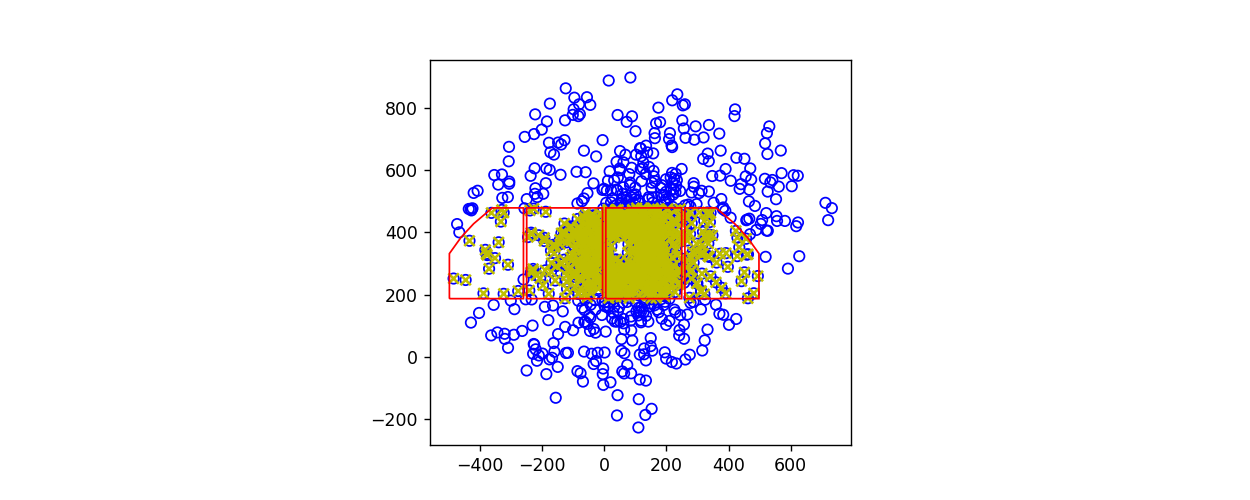

In [7]:
plt.figure(figsize=(10, 4))
plt.gca().set_aspect('equal')

# Plot the mask layout
drawUtils.drawPatch(plt.gca(), layout, fc='None', ec='r')

plt.scatter (allTargets.xarcs, allTargets.yarcs, fc='None', ec='b')
plt.scatter (inTargets.xarcs, inTargets.yarcs, fc='None', ec='y', marker='x')


### Plot only inside the mask

<IPython.core.display.Javascript object>


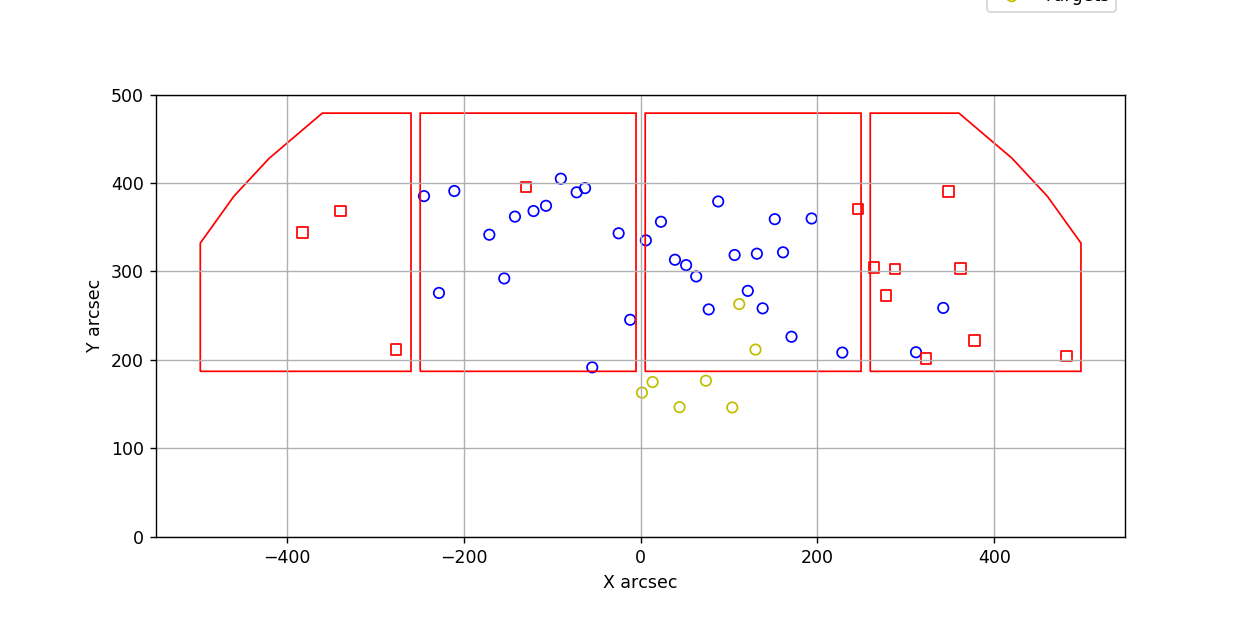

In [8]:
plt.figure(figsize=(10, 5))
plt.gca().set_aspect('equal')

# Plot the mask layou
drawUtils.drawPatch(plt.gca(), layout, fc='None', ec='r')

plt.scatter (inSelectedTargets.xarcs, inSelectedTargets.yarcs, fc='None', ec='b', label='Targets')
#plt.scatter (inTargets.xarcs, inTargets.yarcs,  fc='None', ec='b', label='Inside')

plt.scatter (inAlignBoxes.xarcs, inAlignBoxes.yarcs, fc='None', ec='r', marker='s', label='Align')
plt.scatter (guideBoxes.xarcs, guideBoxes.yarcs, fc='None', ec='y', label='Targets')

plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right')
plt.xlabel ("X arcsec")
plt.ylabel ("Y arcsec")
plt.ylim (0, 500)
plt.grid()



In [9]:
guideBoxes

,objectId,raHour,decDeg,eqx,mag,pBand,pcode,sample,selected,slitWPA,length1,length2,slitWidth,orgIndex,inMask,xarcs,yarcs
206,N2419-S1223,7.637554,38.830822,2000.0,15.37,I,-1,3,1,60.0,4.0,4.0,1.5,206,0,1.513723,162.890241
211,N2419-S1229,7.637590,38.835522,2000.0,16.76,I,-1,3,1,60.0,4.0,4.0,1.5,211,0,13.540225,174.885526
269,N2419-S1302,7.638026,38.871792,2000.0,16.20,I,-1,2,1,60.0,4.0,4.0,1.5,269,1,111.541043,263.091614
337,N2419-S1389,7.638579,38.834922,2000.0,14.18,I,-1,3,1,60.0,4.0,4.0,1.5,337,0,44.025147,146.468732
344,N2419-S1397,7.638665,38.846608,2000.0,17.36,I,-1,2,1,60.0,4.0,4.0,1.5,344,0,73.839622,176.368859
372,N2419-S1442,7.639148,38.864111,2000.0,16.52,I,-1,2,1,60.0,4.0,4.0,1.5,372,1,129.900016,211.577578
412,N2419-S1499,7.639670,38.845503,2000.0,14.68,I,-1,3,1,60.0,4.0,4.0,1.5,412,0,103.655779,146.146923
